In [0]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from PIL import Image

%matplotlib inline

In [0]:
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

In [0]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

In [0]:
def points_plot_prob(ax, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold, ccolor=cm, psize=10, alpha=0.1):
    ax,xx,yy = points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=False, colorscale=colorscale, cdiscrete=cdiscrete, psize=psize, alpha=alpha, predicted=True) 
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
    cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14, axes=ax)
    return ax

# Using sklearn: The heights and weights example

In [6]:
from google.colab import files
upload = files.upload()

Saving 01_heights_weights_genders.csv to 01_heights_weights_genders.csv


In [7]:
dflog=pd.read_csv("01_heights_weights_genders.csv")
dflog.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


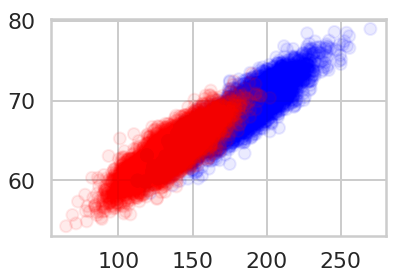

In [9]:
plt.scatter(dflog.Weight, dflog.Height, c=[cm_bright.colors[i] for i in dflog.Gender=="Male"], alpha=0.08)

In [0]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    fold = KFold(nfold, shuffle=False, random_state=None)
    for train, test in fold.split(y): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [0]:
from sklearn.model_selection import train_test_split
Xlr, Xtestlr, ylr, ytestlr = train_test_split(dflog[['Height','Weight']].values, (dflog.Gender=="Male").values)

In [13]:
#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100]
from sklearn.linear_model import LogisticRegression
max_score = 0

for C in Cs:
        clf = LogisticRegression(C=C)
        score = cv_score(clf, Xlr, ylr)

        if score > max_score:
            max_score = score
            best_C =C
print(max_score, best_C)

0.9205333333333334 0.001


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [14]:
clfl=LogisticRegression(C=best_C)
clfl.fit(Xlr, ylr)
ypred=clfl.predict(Xtestlr)
accuracy_score(ypred, ytestlr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9168

In [15]:
from sklearn.model_selection import GridSearchCV
clfl2=LogisticRegression()
parameters = {"C": [0.0001, 0.001, 0.1, 1, 10, 100]}
fitmodel = GridSearchCV(clfl2, param_grid=parameters, cv=5, scoring="accuracy")
fitmodel.fit(Xlr, ylr)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.cv_results_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

(LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 {'C': 0.001},
 0.9205333333333333,
 {'mean_fit_time': array([0.0085309 , 0.00712619, 0.00710869, 0.00709472, 0.0072412 ,
         0.00700617]),
  'mean_score_time': array([0.00073748, 0.00046968, 0.0004005 , 0.00040736, 0.00041766,
         0.0003871 ]),
  'mean_test_score': array([0.91946667, 0.92053333, 0.9204    , 0.9204    , 0.9204    ,
         0.9204    ]),
  'param_C': masked_array(data=[0.0001, 0.001, 0.1, 1, 10, 100],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'C': 0.0001},
   {'C': 0.001},
   {'C': 0.1},
   {'C': 1},
   {'C': 10},
   {'C': 100}],
  'rank_test_s

In [16]:
clfl2=LogisticRegression(C=fitmodel.best_params_['C'])
clfl2.fit(Xlr, ylr)
ypred2=clfl2.predict(Xtestlr)
accuracy_score(ypred2, ytestlr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9168

# How to Classify

# ATM Camera Example

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [18]:
!ls "/content/drive/My Drive"

 11_20186008.csv
 11_20186008.gsheet
 11.wav
'12_20186008 (1).gsheet'
 12_20186008.csv
 12_20186008.gsheet
 13_20186008.csv
 13_20186008.gsheet
 13.wav
 14.wav
 20186008_a4
 20186008_a5
 20186008_a6
 20186008_a6.zip
 20186008_aps
 20186008_Corrections_ADS-1.gsheet
 20186008_ma
 20186008_ps
 20186008-SEF_2019
 22_20186008.csv
 22_20186008.gsheet
 24.gdoc
 25_20186008.csv
 25_20186008.gsheet
 A1.gdoc
'Activity - 2.gdoc'
'Activity - 8.gdoc'
'Armstrong Number.gdoc'
'ARTIFICIAL INTELLIGENCE'
'Assignment - 1 (CNF - Module - 5).gdoc'
 Assignment.gdoc
 CAPSTONE
 CCC
 Classroom
'Client Meeting-ppt.gslides'
'Client Meeting-ppt.pptx'
'CLOUD COMPUTING'
'Colab Notebooks'
 com.gdoc
'ComputationalThinking_ Template for Solving Problems.docx'
 com.txt
 Confidential.gdoc
 Co-occurrencePublic.pdf
 Corrections.gsheet
'Creating a connection to the Database.gdoc'
'Cross Cultural Sensitivities.gslides'
'Cyber Security (CS)'
 data
'DATA ANALYTICS'
'Display Even Characters.gdoc'
'Ethiopian Multiplication.gdoc

In [19]:
data=np.load("/content/drive/My Drive/Colab Notebooks/imag.pix.npy", allow_pickle=True)
y=np.load("/content/drive/My Drive/Colab Notebooks/imag.lbl.npy", allow_pickle=True)
STANDARD_SIZE = (322, 137)#standardized pixels in image.
data.shape, y.shape

((87, 132342), (87,))

In [0]:
def get_image(mat):
    size = STANDARD_SIZE[0]*STANDARD_SIZE[1]*3
    r,g,b = mat[0:size:3], mat[1:size:3],mat[2:size:3]
    rgbArray = np.zeros((STANDARD_SIZE[1],STANDARD_SIZE[0], 3), 'uint8')#3 channels
    rgbArray[..., 0] = r.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    rgbArray[..., 1] = b.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    rgbArray[..., 2] = g.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    return rgbArray

def display_image(mat):
    with sns.axes_style("white"):
        plt.imshow(get_image(mat))
        plt.xticks([])
        plt.yticks([])

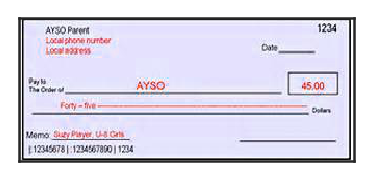

In [21]:
display_image(data[5])

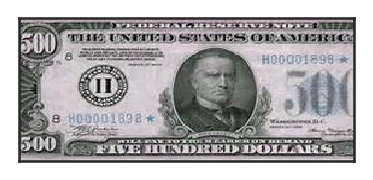

In [22]:
display_image(data[50])

# Feature Engineering

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=60)
X = pca.fit_transform(data)

In [25]:
print(pca.explained_variance_ratio_.sum())

0.9423102011085978


In [26]:
pca.explained_variance_ratio_*100

array([35.92596698,  6.29318801,  4.10778347,  3.11950952,  2.81695972,
        2.28831619,  2.10127948,  1.87404971,  1.73264632,  1.53023759,
        1.42159667,  1.31839329,  1.24701506,  1.16381723,  1.09957954,
        1.06073095,  1.00742561,  0.98023083,  0.96055555,  0.91534967,
        0.90185128,  0.85212717,  0.8367163 ,  0.79690677,  0.75486243,
        0.72503981,  0.70819005,  0.67965239,  0.66088367,  0.64757338,
        0.62737153,  0.59472508,  0.58297593,  0.57422337,  0.57271537,
        0.55236659,  0.53837399,  0.5333111 ,  0.51651786,  0.49303236,
        0.48516456,  0.47695649,  0.47214075,  0.45569061,  0.44218339,
        0.43860784,  0.43355019,  0.42716107,  0.41935381,  0.40523734,
        0.40237171,  0.39285836,  0.38878173,  0.38245112,  0.37741801,
        0.35961344,  0.34829372,  0.34660151,  0.33610029,  0.32643634])

In [27]:
df = pd.DataFrame({"y":y, "label":np.where(y==1, "check", "dollar")})
for i in range(pca.explained_variance_ratio_.shape[0]):
    df["pc%i" % (i+1)] = X[:,i]
df.head()

,y,label,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39,pc40,pc41,pc42,pc43,pc44,pc45,pc46,pc47,pc48,pc49,pc50,pc51,pc52,pc53,pc54,pc55,pc56,pc57,pc58,pc59,pc60
0,1,check,-22536.362571,-2428.343801,-2133.776522,-328.321905,-1065.246138,79.780883,-425.016588,622.449987,-2490.266854,-858.494855,-1072.564905,277.445345,-1117.287432,713.128139,-788.775216,414.970816,-197.132875,471.712254,-428.445011,-609.710563,-589.824473,-266.760207,-988.907600,954.141147,1036.425758,568.528912,-45.101520,-111.891899,-520.738552,545.256213,-644.336594,84.353812,-738.799353,1250.067983,669.876975,-142.356781,495.988275,302.003789,-258.514425,9.354481,-415.334196,747.502714,583.226365,-478.055779,461.804140,98.459821,70.792668,281.250903,-543.144379,-34.768587,-685.484695,238.625681,450.318160,-165.452216,-152.959473,-47.351520,-188.059986,-465.128738,-0.110182,-210.253234
1,1,check,-22226.658684,-709.255173,-288.832560,-1300.640667,-792.069096,217.424428,1076.793446,-2114.973124,-875.467124,-1124.518039,-343.099209,-43.325747,547.607249,357.384435,-1762.389402,-371.530024,812.177397,291.403979,-939.327160,155.764497,-1122.965263,507.900379,-820.640402,721.840569,283.115351,-111.884891,815.630551,1144.767374,-347.333038,108.440989,-850.730028,580.786526,310.476997,138.334792,689.560984,-678.102694,-117.894037,-208.391817,-122.147460,-334.955125,147.317064,22.620406,678.375060,-24.195859,307.419157,-16.793211,30.110192,314.134433,1242.106699,-190.682178,-364.412360,-22.209761,198.192170,202.484983,577.853257,-210.695152,-192.683446,-259.941043,-173.253313,-256.766492
2,1,check,-17364.260784,-4252.026709,793.796219,-1362.064655,-374.190314,3142.092485,2514.218998,1444.113324,-121.110892,-419.269674,-2083.060585,1717.638320,-723.264715,-1240.548136,-311.986608,-1058.383236,1384.281010,-802.600542,-2596.907895,-880.371333,3384.133000,-391.128654,-3422.339327,1345.488172,-4766.712194,1049.278661,2199.874006,-691.973829,1395.946475,-2196.745349,-637.544609,1669.350209,1778.985916,-3164.731022,685.186900,2255.209827,-3070.227392,3024.468942,866.098382,499.375910,1686.965891,-3181.326028,3537.618556,1433.654668,932.759045,-889.548580,447.173806,-1508.255113,-759.580239,319.240260,-4119.543734,-1185.173619,1304.699309,-1811.960158,-1580.505530,-1917.800889,285.741221,-1238.373075,1603.907824,3.947052
3,1,check,-22847.256200,-900.593372,577.227901,-180.284525,-733.246902,-107.880565,1441.721495,-1070.682436,844.657669,-1390.917240,1470.626667,-724.723797,-578.954822,-259.546347,932.767398,167.502842,-297.739318,880.953788,-182.794899,1232.275311,551.110817,-171.684950,-312.904996,-382.251424,-907.220549,163.851536,1305.061285,105.963908,-318.995585,-422.233295,-170.568583,-43.599936,109.574362,864.045545,278.236927,687.423175,423.446325,394.419465,104.337544,-488.169384,1450.067719,-988.744913,-997.237379,685.765747,685.855751,-98.626225,601.818220,-602.945930,-1220.265111,889.048371,-712.775719,-159.524096,203.008358,-472.417354,159.755262,1161.159726,16.208589,72.455431,-278.474336,76.233102
4,1,check,-15868.672595,3259.490262,506.804142,-919.630856,2166.540670,-981.801650,-1669.603156,-391.535580,1736.033605,162.953570,-1627.335032,-557.245046,-860.889122,1721.493743,948.995356,-1135.829439,2145.369587,772.899323,-1095.871174,603.966434,-24.719590,85.418222,-490.577669,1086.536339,356.585257,-1237.425531,-675.698272,-714.558600,-161.430269,-853.985804,1001.334591,-3620.570787,2139.896350,-3518.110154,742.681720,-2088.231281,1878.337427,2104.479614,2492.244552,-491.566338,119.857925,1271.545412,1308.829242,-1133.350869,-195.747929,1214.982832,249.133391,694.186467,3177.064366,-1284.577542,98.237200,-2525.167900,-387.105823,-549.122966,3572.552185,1068.788694,2162.162152,-353.379787,1165.320358,-1746.132274


In [0]:
def normit(a):
    a=(a - a.min())/(a.max() -a.min())
    a=a*256
    return np.round(a)
def getNC(pc, j):
    size=322*137*3
    r=pc.components_[j][0:size:3]
    g=pc.components_[j][1:size:3]
    b=pc.components_[j][2:size:3]
    r=normit(r)
    g=normit(g)
    b=normit(b)
    return r,g,b
def display_component(pc, j):
    r,g,b = getNC(pc,j)
    rgbArray = np.zeros((137,322,3), 'uint8')
    rgbArray[..., 0] = r.reshape(137,322)
    rgbArray[..., 1] = g.reshape(137,322)
    rgbArray[..., 2] = b.reshape(137,322)
    plt.imshow(rgbArray)
    plt.xticks([])
    plt.yticks([])

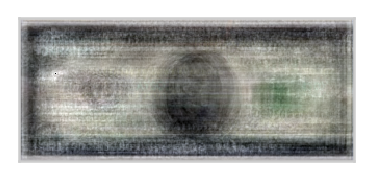

In [29]:
display_component(pca,0)

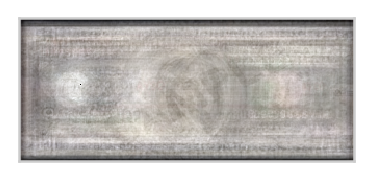

In [30]:
display_component(pca,1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


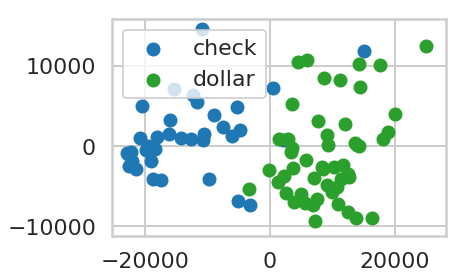

In [31]:
colors = [c0, c2]
for label, color in zip(df['label'].unique(), colors):
    mask = df['label']==label
    plt.scatter(df[mask]['pc1'], df[mask]['pc2'], c=color, label=label)
plt.legend()

# k-NN Algorithm

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
ys=df['y'].astype(int).values
subdf=df[['pc1','pc2']]
subdfstd=(subdf - subdf.mean())/subdf.std()
Xs=subdfstd.values
def classify(X,y, nbrs, plotit=True, train_size=0.6):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf= KNeighborsClassifier(nbrs)
    clf=clf.fit(Xtrain, ytrain)
    #in sklearn accuracy can be found by using "score". It predicts and then gets the accuracy
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    Xall=np.concatenate((Xtrain, Xtest))
    if plotit:
        print("Accuracy on training data: %0.2f" % (training_accuracy))
        print("Accuracy on test data:     %0.2f" % (test_accuracy))
        plt.figure()
        ax=plt.gca()
        points_plot(ax, Xtrain, Xtest, ytrain, ytest, clf, alpha=0.3, psize=20)
    return nbrs, training_accuracy, test_accuracy

Accuracy on training data: 1.00
Accuracy on test data:     0.94


(1, 1.0, 0.9428571428571428)

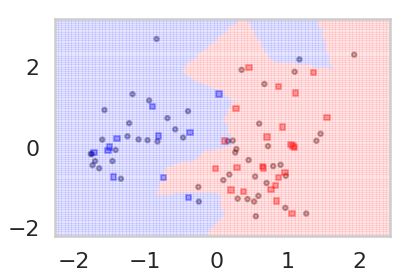

In [35]:
classify(Xs,ys,1)

Accuracy on training data: 0.52
Accuracy on test data:     0.69


(50, 0.5192307692307693, 0.6857142857142857)

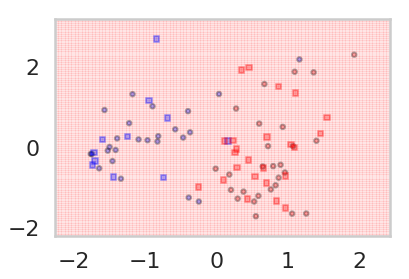

In [40]:
classify(Xs,ys,50)#run this a few times

# Error Against Complexity (k) and cross-validation

In [0]:
fits={}
for k in np.arange(1,45,1):
    fits[k]=[]
    for i in range(200):
        fits[k].append(classify(Xs, ys,k, False))
nbrs=np.arange(1,45,1)
fmeanstr = np.array([1.-np.mean([t[1] for t in fits[e]]) for e in nbrs])
fmeanste = np.array([1.-np.mean([t[2] for t in fits[e]]) for e in nbrs])
fstdsstr = np.array([np.std([t[1] for t in fits[e]]) for e in nbrs])
fstdsste = np.array([np.std([t[2] for t in fits[e]]) for e in nbrs])

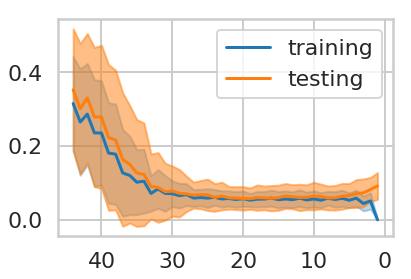

In [42]:
plt.gca().invert_xaxis()
plt.plot(nbrs, fmeanstr, color=c0, label="training");
plt.fill_between(nbrs, fmeanstr - fstdsstr, fmeanstr+fstdsstr, color=c0, alpha=0.3)
plt.plot(nbrs, fmeanste, color=c1, label="testing");
plt.fill_between(nbrs, fmeanste - fstdsste, fmeanste+fstdsste, color=c1, alpha=0.5)

plt.legend()

In [0]:
def cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=5):
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(Xtrain, ytrain)
    print("BEST PARAMS", gs.best_params_)
    best = gs.best_estimator_
    return best

In [0]:
from sklearn.model_selection import train_test_split
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, standardize=False, train_size=0.8):
    subdf=indf[featurenames]
    if standardize:
        subdfstd=(subdf - subdf.mean())/subdf.std()
    else:
        subdfstd=subdf
    X=subdfstd.values
    y=(indf[targetname].values==target1val)*1
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf = cv_optimize(clf, parameters, Xtrain, ytrain)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print("Accuracy on training data: %0.2f" % (training_accuracy))
    print("Accuracy on test data:     %0.2f" % (test_accuracy))
    return clf, Xtrain, ytrain, Xtest, ytest

In [48]:
bestcv, Xtrain, ytrain, Xtest, ytest = do_classify(KNeighborsClassifier(), {"n_neighbors": range(1,40,2)}, df, ['pc1','pc2'], 'label', 'check')

BEST PARAMS {'n_neighbors': 3}
Accuracy on training data: 0.96
Accuracy on test data:     0.94


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


(<matplotlib.axes._subplots.AxesSubplot at 0x7fdfee3ea6a0>,
 array([[-22847.75620044, -22364.04432628, -21880.33245212, ...,
          24072.2955933 ,  24556.00746746,  25039.71934162],
        [-22847.75620044, -22364.04432628, -21880.33245212, ...,
          24072.2955933 ,  24556.00746746,  25039.71934162],
        [-22847.75620044, -22364.04432628, -21880.33245212, ...,
          24072.2955933 ,  24556.00746746,  25039.71934162],
        ...,
        [-22847.75620044, -22364.04432628, -21880.33245212, ...,
          24072.2955933 ,  24556.00746746,  25039.71934162],
        [-22847.75620044, -22364.04432628, -21880.33245212, ...,
          24072.2955933 ,  24556.00746746,  25039.71934162],
        [-22847.75620044, -22364.04432628, -21880.33245212, ...,
          24072.2955933 ,  24556.00746746,  25039.71934162]]),
 array([[-9329.39415794, -9329.39415794, -9329.39415794, ...,
         -9329.39415794, -9329.39415794, -9329.39415794],
        [-9087.20651297, -9087.20651297, -9087.20

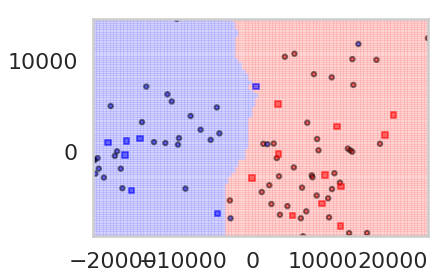

In [49]:
plt.figure()
ax=plt.gca()
points_plot(ax, Xtrain, Xtest, ytrain, ytest, bestcv, alpha=0.5, psize=20)

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'axes'
  s)


TypeError: ignored

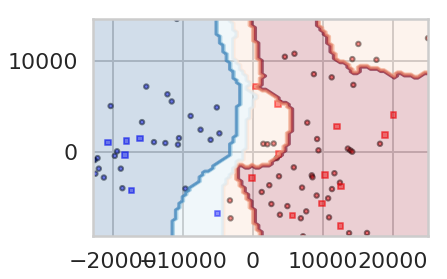

In [56]:
plt.figure()
ax=plt.gca()
points_plot_prob(ax, Xtrain, Xtest, ytrain, ytest, bestcv, alpha=0.5, psize=20)

In [0]:
?points_plot_prob

# Evaluation

In [57]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(ytest, bestcv.predict(Xtest),)

array([[11,  0],
       [ 1,  6]])

# Logistic Regression

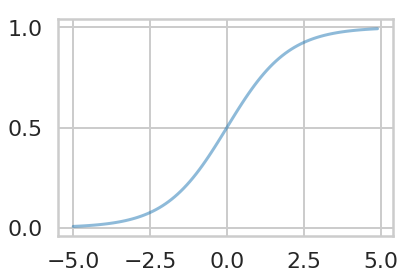

In [58]:
h = lambda z: 1./(1+np.exp(-z))
zs=np.arange(-5,5,0.1)
plt.plot(zs, h(zs), alpha=0.5)

In [59]:
dflog.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [60]:
clf_l, Xtrain_l, ytrain_l, Xtest_l, ytest_l  = do_classify(LogisticRegression(), {"C": [0.01, 0.1, 1, 10, 100]}, dflog, ['Weight', 'Height'], 'Gender','Male')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

BEST PARAMS {'C': 0.01}
Accuracy on training data: 0.92
Accuracy on test data:     0.92


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(<matplotlib.axes._subplots.AxesSubplot at 0x7fdfee1653c8>,
 array([[ 64.20012671,  66.28385976,  68.36759281, ..., 266.32223241,
         268.40596546, 270.48969851],
        [ 64.20012671,  66.28385976,  68.36759281, ..., 266.32223241,
         268.40596546, 270.48969851],
        [ 64.20012671,  66.28385976,  68.36759281, ..., 266.32223241,
         268.40596546, 270.48969851],
        ...,
        [ 64.20012671,  66.28385976,  68.36759281, ..., 266.32223241,
         268.40596546, 270.48969851],
        [ 64.20012671,  66.28385976,  68.36759281, ..., 266.32223241,
         268.40596546, 270.48969851],
        [ 64.20012671,  66.28385976,  68.36759281, ..., 266.32223241,
         268.40596546, 270.48969851]]),
 array([[53.76313333, 53.76313333, 53.76313333, ..., 53.76313333,
         53.76313333, 53.76313333],
        [54.02308897, 54.02308897, 54.02308897, ..., 54.02308897,
         54.02308897, 54.02308897],
        [54.28304462, 54.28304462, 54.28304462, ..., 54.28304462,
       

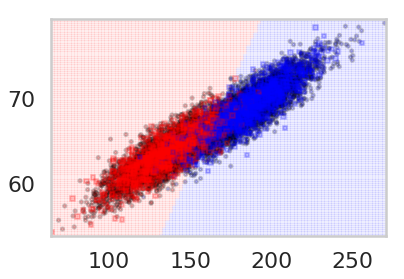

In [61]:
plt.figure()
ax=plt.gca()
points_plot(ax, Xtrain_l, Xtest_l, ytrain_l, ytest_l, clf_l, alpha=0.2)

Maximizing the Probability of the training set

In [64]:
clf_l.predict_proba(Xtest_l)

array([[3.88198578e-01, 6.11801422e-01],
       [8.91491403e-04, 9.99108509e-01],
       [3.29817203e-01, 6.70182797e-01],
       ...,
       [8.36741521e-04, 9.99163258e-01],
       [1.42086925e-02, 9.85791308e-01],
       [1.56025754e-02, 9.84397425e-01]])

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'axes'
  s)


TypeError: ignored

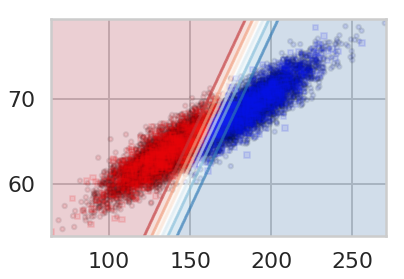

In [63]:
plt.figure()
ax=plt.gca()
points_plot_prob(ax, Xtrain_l, Xtest_l, ytrain_l, ytest_l, clf_l, psize=20, alpha=0.1)